In [44]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import helpers
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, learning_curve

In [2]:
df = pd.read_csv('data/train.csv',index_col=0)
train = pd.read_csv('data/train_encoded.csv',index_col = 0)
test = pd.read_csv('data/test_encoded.csv',index_col = 0)
y = df['target']

In [3]:
categorical = list(df.select_dtypes('object').columns)
numerical = list(df.select_dtypes('float64').columns)

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<module 'matplotlib.pyplot' from 'd:\\projects\\funwithkaggle\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

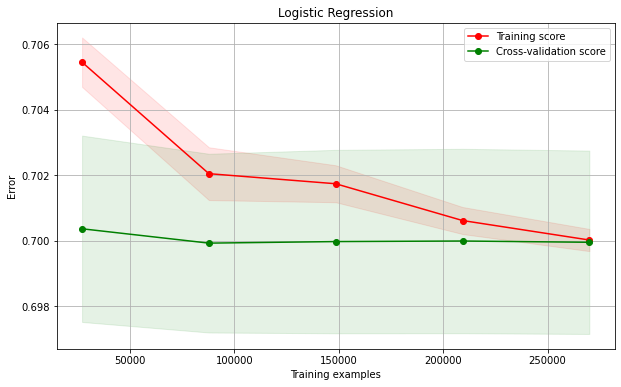

In [8]:
# Logistic Regression on numerical features
title = 'Logistic Regression'
helpers.plot_learning_curve(LogisticRegression(),title,train[numerical],
                            y,score='roc_auc',cv=10)

In [10]:
logreg_preds=LogisticRegression().fit(train[numerical],y).predict(test[numerical])
logreg_preds = pd.DataFrame(logreg_preds,index=test.index)
logreg_preds.columns = ['target']
logreg_preds.to_csv('predictions/logreg.csv')

<module 'matplotlib.pyplot' from 'd:\\projects\\funwithkaggle\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

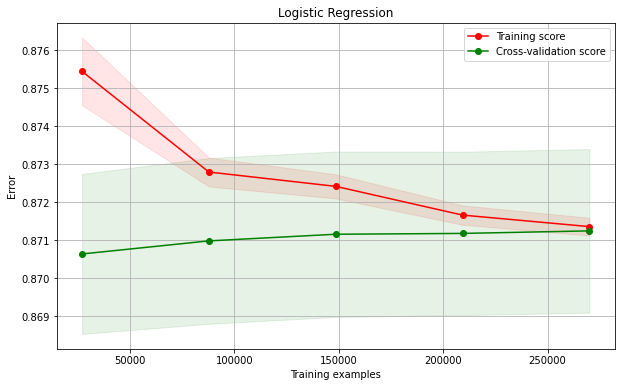

In [14]:
# logistic regression on scaled data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
helpers.plot_learning_curve(LogisticRegression(),title,train_scaled,
                            y,score='roc_auc',cv=10)

In [16]:
test_scaled = scaler.transform(test)
logreg2_preds=LogisticRegression().fit(train_scaled,y).predict(test_scaled)
logreg2_preds = pd.DataFrame(logreg2_preds,index=test.index)
logreg2_preds.columns = ['target']
logreg2_preds.to_csv('predictions/logreg2.csv')

### Support vector machine

In [22]:
from sklearn.svm import LinearSVC 

<module 'matplotlib.pyplot' from 'd:\\projects\\funwithkaggle\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

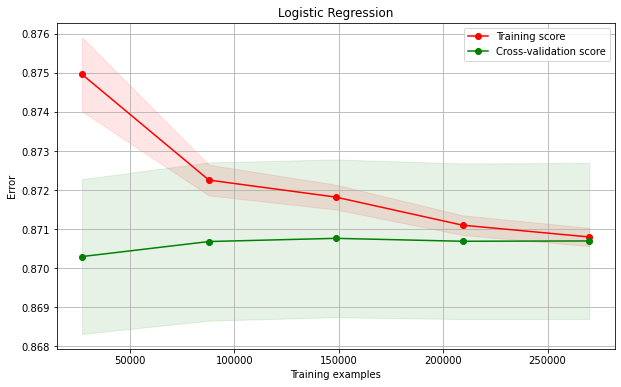

In [30]:
helpers.plot_learning_curve(LinearSVC(dual=False),title,train_scaled,
                            y,score='roc_auc',cv=10)

In [31]:
svm_preds = LinearSVC(dual=False).fit(train_scaled,y).predict(test_scaled)
svm_preds = pd.DataFrame(svm_preds,index=test.index)
svm_preds.columns = ['target']
svm_preds.to_csv('predictions/svm.csv')

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
rfc_preds = RandomForestClassifier().fit(train,y).predict(test)
rfc_preds = pd.DataFrame(rfc_preds,index=test.index)
rfc_preds.columns = ['target']
rfc_preds.to_csv('predictions/rfc.csv')

### XGBoost

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [41]:
# get validation set for early stopping
X_train,X_val,y_train,y_val=train_test_split(train,y,train_size=0.8)

In [50]:
# fitting model
gbm = XGBClassifier(n_estimators=1000,learning_rate=0.01)
gbm.fit(X_train,y_train,early_stopping_rounds=5,
        eval_set=[(X_val,y_val)],verbose=False)

[19:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
# making and saving prediction
gbm_preds = pd.DataFrame(gbm.predict(test),index=test.index,
                        columns=['target'])
gbm_preds.to_csv('predictions/xgb.csv')

In [52]:
gbm_preds.sum()

target    42071
dtype: int64

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
train_preds = gbm.predict(train)
roc_auc_score(train_preds,y)

0.8243152135511901